Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


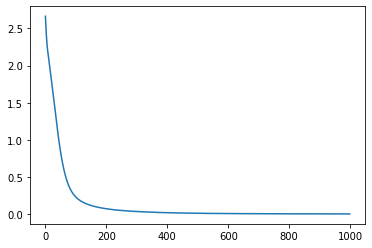

In [1]:
import torch
from torch import nn
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)
print(net)
from torch import optim
from sklearn.datasets import load_digits
digits = load_digits()

x = digits.data
y = digits.target
#numpyをtorchに変換
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.int64)
#ソフトマックスエントロピー
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters())

losses = []

for epoc in range(1000):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

from matplotlib import pyplot as plt
plt.plot(losses)